En el siguiente código se desarrolla la minimización de $\chi^2$ usando un muestreo Montecarlo

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import uniform
%matplotlib inline

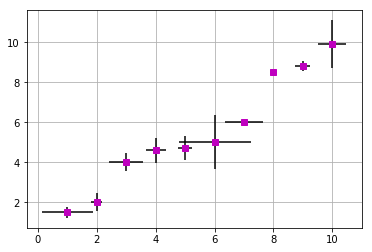

In [2]:
# Datos
x = np.linspace(1,10,10)
y = [1.5,2.0,4.0,4.6,4.7,5.0,6.0,8.5,8.8,9.9]
x_error = np.random.normal(0.1,0.5, len(x))
y_error = np.random.normal(0.1,0.5, len(y))

plt.plot(x,y,'.',color='m')
plt.errorbar(x,y,yerr=y_error,xerr=x_error, fmt='ms',ecolor='k')
plt.grid(True)

In [3]:
def chi(x,a,b): # se define una funcion y se dice de que depende coordenada x, a, b
    return a*x+b # modelo que se calcula y= ax +b

In [4]:
#definiendo chi cuadrado
chi_2 = lambda a,b:(((y-chi(x,a,b))**2)/y_error**2).sum() # chi cuadrado con la sumatoria
chi_2= np.vectorize(chi_2) # crea un vector que tiene toda la informacion

In [5]:
#muestreo de distribucion uniforme de los parametros a (pendiente) y b (corte)
pendiente = np.random.uniform(0,2,10**4)
corte = np.random.uniform(-5,5,10**4)

#ordenando los valores
pendiente.sort() 
corte.sort()

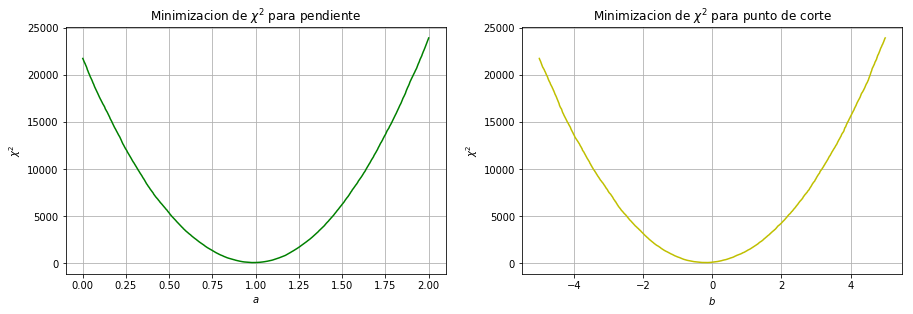

In [6]:
#evualuando chi_2 con los valores de la muestra
chi_sq = chi_2(pendiente,corte)

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(221) #primer plot
ax.set_xlabel(r'$a$')
ax.set_ylabel(r'$\chi^2$')
ax.plot(pendiente,chi_sq,color='g')
ax.set_title(r'Minimizacion de $\chi^2$ para pendiente',fontdict=None, loc=u'center')
ax.grid(True)
ax2 = fig.add_subplot(222) #segundo plot
ax2.set_xlabel(r'$b$')
ax2.set_ylabel(r'$\chi^2$')
ax2.set_title(r'Minimizacion de $\chi^2$ para punto de corte',fontdict=None, loc=u'center')
ax2.plot(corte,chi_sq,color='y')
ax2.grid(True)

In [7]:
# Obteniendo los valores de a y b que minimizan chi_2
best_values = np.where(chi_sq == np.min(chi_sq))
a_best = pendiente[best_values]
b_best = corte[best_values]
chisq_value = chi_sq[best_values]
print 'El mejor valor de la pendiente es ', a_best
print 'El mejor valor del corte en la ordenada es ', b_best
print r'El valor de chi^2 es ', chisq_value

El mejor valor de la pendiente es  [ 0.98544105]
El mejor valor del corte en la ordenada es  [-0.17839197]
El valor de chi^2 es  [ 81.94236776]


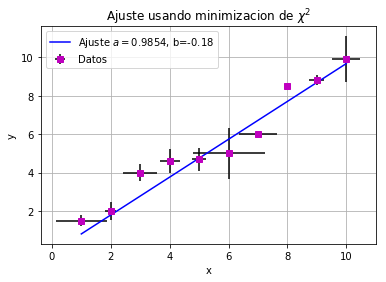

In [8]:
# Presentando los resultados
plt.plot(x,chi(x, a_best, b_best), linestyle='-', color='b', label=r'Ajuste $a=%.4f$, b=%.2f' % (a_best,b_best))
plt.errorbar(x,y,yerr=y_error,xerr=x_error, fmt='ms',ecolor='k',label='Datos')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.title(r'Ajuste usando minimizacion de $\chi^2$')
legend= plt.legend(loc='upper left', prop={'size':10})